In [5]:
import h5py
import glob
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
params = {'image.cmap': "Set2"}
matplotlib.rcParams.update(params)
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *


In [6]:
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/with_LAD/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0044/'

inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)
x = np.linspace(0,Lx,int(Nx))
z = np.linspace(0,Lz,int(Nz))
kx = [2.0*np.pi/float(Lx)*w for w in range(0,int(Nx/2))]; kx = np.array(kx)
kz = [2.0*np.pi/float(Lz)*w for w in range(0,int(Nz/2))]; kz = np.array(kz)
print(np.amax(kx),np.amax(kz))

flist = glob.glob(directory+"*enstrophy*npy")
flist.sort()
print([f.split('/')[-1] for f in flist])

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
(40.13384614960961, 40.05530633326986)
['shearlayer_enstrophy_0582.dat.npy']


(2.0, 1.0)


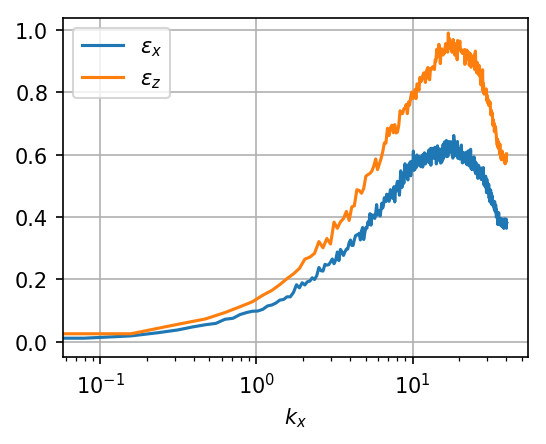

In [7]:
fname = flist[-1]
dat = np.load(fname)

specx = np.mean(abs(np.fft.fft(dat,axis=0)),axis=1)
specz = np.mean(abs(np.fft.fft(dat,axis=1)),axis=0)

plt.figure(figsize=(4,3),dpi=150)
plt.semilogx(kx,kx*specx[:Nx/2]/specx[0])
plt.semilogx(kz,kz*specz[:Nz/2]/specz[0])
# plt.ylim([1e-1,10])
plt.grid(True)
plt.legend([r'$\epsilon_{x}$',r'$\epsilon_{z}$'])
plt.xlabel(r'$k_x$')
print(inp.Mc,inp.rr)
# plt.savefig(directory+'/img/grad_spec.png',dpi=200,bbox_inches='tight')

Text(0.5,0,'$k_x$')

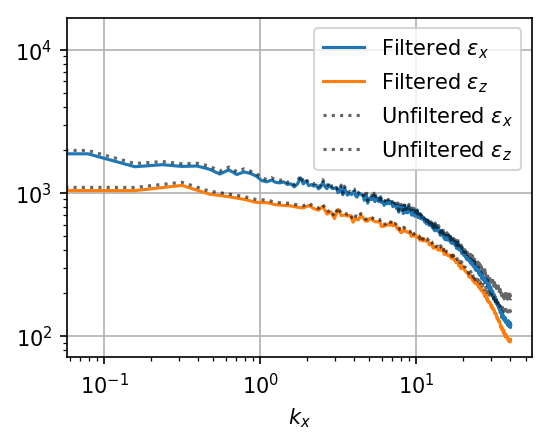

In [32]:
# With/without filtering

plt.figure(figsize=(4,3),dpi=150)

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0044_/'
flist = glob.glob(directory+"*enstrophy*npy")
flist.sort()
fname = flist[-1]
dat = np.load(fname)
specx = np.mean(abs(np.fft.fft(dat,axis=0)),axis=1)
specz = np.mean(abs(np.fft.fft(dat,axis=1)),axis=0)
plt.loglog(kx,specx[:Nx/2],color='C0',label=r'Filtered $\epsilon_{x}$')
plt.loglog(kz,specz[:Nz/2],color='C1',label=r'Filtered $\epsilon_{z}$')

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0044_nofilter/'
flist = glob.glob(directory+"*enstrophy*npy")
flist.sort()
fname = flist[-1]
dat = np.load(fname)
specx = np.mean(abs(np.fft.fft(dat,axis=0)),axis=1)
specz = np.mean(abs(np.fft.fft(dat,axis=1)),axis=0)
plt.loglog(kx,specx[:Nx/2],':',color='k',alpha=0.6,label=r'Unfiltered $\epsilon_{x}$')
plt.loglog(kz,specz[:Nz/2],':',color='k',alpha=0.6,label=r'Unfiltered $\epsilon_{z}$')

# plt.ylim([1e-2,1000])
plt.grid(True)
plt.legend()
plt.xlabel(r'$k_x$')


1024x1448x512
724x1024x362
512x724x256


Text(0.5,1,'$\\epsilon_{z}$')

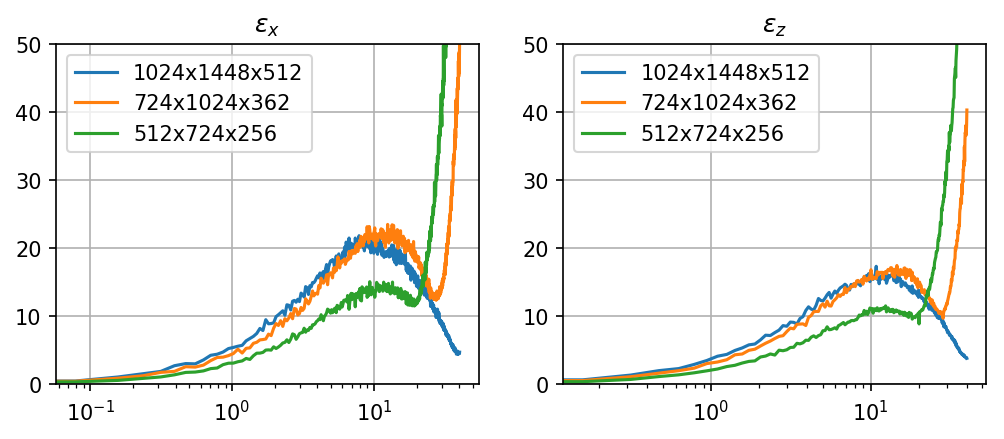

In [31]:
# Grid resolution
def get_enstr_spec(directory): # gets last spectra
    flist = glob.glob(directory+"*enstrophy*npy")
    flist.sort()
    fname = flist[-1]
    dat = np.load(fname)
    specx = np.mean(abs(np.fft.fft(dat,axis=0)),axis=1)
    specz = np.mean(abs(np.fft.fft(dat,axis=1)),axis=0)
    return specx, specz

fig,ax = plt.subplots(1,2,figsize=(8,3),dpi=150)
Mc = '02'

gridres = '1024x1448x512'; print(gridres)
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr1/%s/'%(Mc,gridres)
specx, specz = get_enstr_spec(directory)
ax[0].semilogx(kx,kx*specx[:Nx/2],'-',color='C0',label=gridres)
ax[1].semilogx(kz,kz*specz[:Nz/2],'-',color='C0',label=gridres)

gridres = '724x1024x362'; print(gridres)
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr1/%s/'%(Mc,gridres)
specx, specz = get_enstr_spec(directory)
ax[0].semilogx(kx,kx*specx[:Nx/2],'-',color='C1',label=gridres)
ax[1].semilogx(kz,kz*specz[:Nz/2],'-',color='C1',label=gridres)

gridres = '512x724x256'; print(gridres)
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr1/%s/'%(Mc,gridres)
specx, specz = get_enstr_spec(directory)
ax[0].semilogx(kx,kx*specx[:Nx/2],'-',color='C2',label=gridres)
ax[1].semilogx(kz,kz*specz[:Nz/2],'-',color='C2',label=gridres)

for a in ax:
    a.grid(True)
    a.legend()
    a.set_ylim([0,5e1])
ax[0].set_title(r'$\epsilon_{x}$')
ax[1].set_title(r'$\epsilon_{z}$')
# plt.xlabel(r'$k_x$')
